In [2]:
import sacc
import numpy as np
from matplotlib import pyplot as plt

In [3]:
ls '/users/boryanah/repos/xCell-likelihoods/simple_marginalization/data/'

cls_covG_lsst_derfrac0.01.fits*  cov_extra_derfrac0.20.npy*
cls_covG_lsst.fits*              cov_extra_derfrac0.50.npy*
cls_covG_lsst_G.fits*            cov_extra_derfrac1.00.npy*
cls_covG_new_derfrac0.01.fits*   lsst_cov_extra_derfrac0.01.npy*
cls_covG_new_derfrac0.05.fits*   lsst_cov_extra.npy*
cls_covG_new_derfrac0.10.fits*   lsst_cov_G.npy*
cls_covG_new_derfrac0.20.fits*   lsst_t_derfrac0.01.npy*
cls_covG_new_derfrac0.50.fits*   t_derfrac0.01.npy*
cls_covG_new_derfrac1.00.fits*   t_derfrac0.05.npy*
cls_covG_new.fits*               t_derfrac0.10.npy*
cov_extra_derfrac0.01.npy*       t_derfrac0.20.npy*
cov_extra_derfrac0.05.npy*       t_derfrac0.50.npy*
cov_extra_derfrac0.10.npy*       t_derfrac1.00.npy*


In [22]:
# s = sacc.Sacc.load_fits('/users/boryanah/repos/xCell-likelihoods/simple_marginalization/data/cls_covG_lsst.fits')
# covG = np.load('/users/boryanah/repos/xCell-likelihoods/simple_marginalization/data/lsst_cov_G.npy')
s = sacc.Sacc.load_fits('data/cls_covG_lsst.fits')
covG_rsh = np.load('data/lsst_cov_G.npy')
# covSSC = np.load('data/lsst_cov_extra.npy')
# covG = covG.reshape(s.covariance.dense.shape)

In [4]:
trcomb = s.get_tracer_combinations()
print(trcomb)

[('DESgc__0', 'DESgc__0'), ('DESgc__1', 'DESgc__1'), ('DESgc__2', 'DESgc__2'), ('DESgc__3', 'DESgc__3'), ('DESgc__4', 'DESgc__4'), ('DESgc__0', 'DESwl__0'), ('DESgc__0', 'DESwl__1'), ('DESgc__0', 'DESwl__2'), ('DESgc__0', 'DESwl__3'), ('DESgc__1', 'DESwl__0'), ('DESgc__1', 'DESwl__1'), ('DESgc__1', 'DESwl__2'), ('DESgc__1', 'DESwl__3'), ('DESgc__2', 'DESwl__0'), ('DESgc__2', 'DESwl__1'), ('DESgc__2', 'DESwl__2'), ('DESgc__2', 'DESwl__3'), ('DESgc__3', 'DESwl__0'), ('DESgc__3', 'DESwl__1'), ('DESgc__3', 'DESwl__2'), ('DESgc__3', 'DESwl__3'), ('DESgc__4', 'DESwl__0'), ('DESgc__4', 'DESwl__1'), ('DESgc__4', 'DESwl__2'), ('DESgc__4', 'DESwl__3'), ('DESwl__0', 'DESwl__0'), ('DESwl__0', 'DESwl__1'), ('DESwl__0', 'DESwl__2'), ('DESwl__0', 'DESwl__3'), ('DESwl__1', 'DESwl__1'), ('DESwl__1', 'DESwl__2'), ('DESwl__1', 'DESwl__3'), ('DESwl__2', 'DESwl__2'), ('DESwl__2', 'DESwl__3'), ('DESwl__3', 'DESwl__3')]


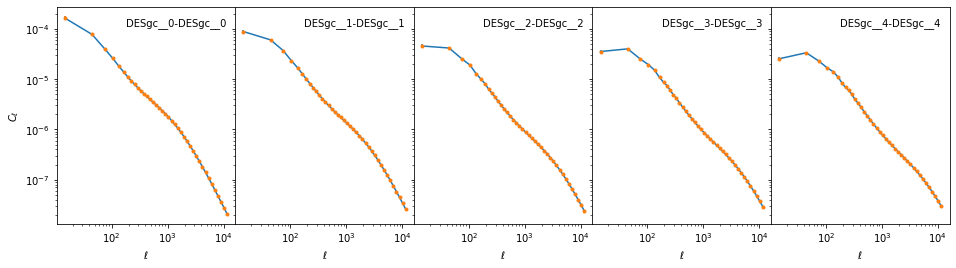

In [27]:
# gc-gc
f, ax = plt.subplots(1, 5, figsize=(16, 4), sharex=True, gridspec_kw={'wspace':0}, sharey=True)
for i in range(5):
    tr1 = tr2 = f'DESgc__{i}'
    ell, cl, cov, ind = s.get_ell_cl('cl_00', tr1, tr2, return_cov=True, return_ind=True)
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))
    
    cov = covG_rsh[ind][:, ind]
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')
    
    assert np.any(cov)
    ax[i].set_xlabel('$\ell$')
    ax[i].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
     verticalalignment='top', transform=ax[i].transAxes)
ax[0].set_ylabel('$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.show()
plt.close()

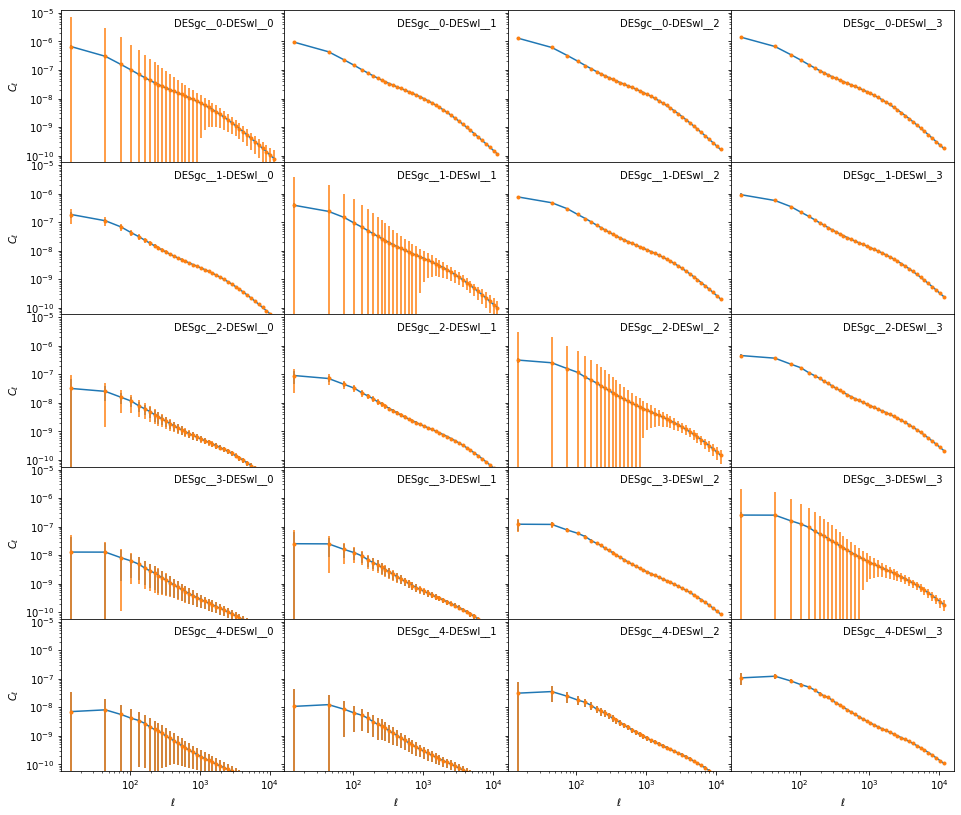

In [28]:
# gc-wl
f, ax = plt.subplots(5, 4, figsize=(16, 14), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i in range(5):
    tr1 = f'DESgc__{i}'
    for j in range(4):
        tr2 = f'DESwl__{j}'
        ell, cl, cov, ind = s.get_ell_cl('cl_0e', tr1, tr2, return_cov=True, return_ind=True)
        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))

        cov = covG_rsh[ind][:, ind]
        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')    
        
        assert np.any(cov)

        ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
         verticalalignment='top', transform=ax[i, j].transAxes)
        ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')
plt.show()
plt.close()

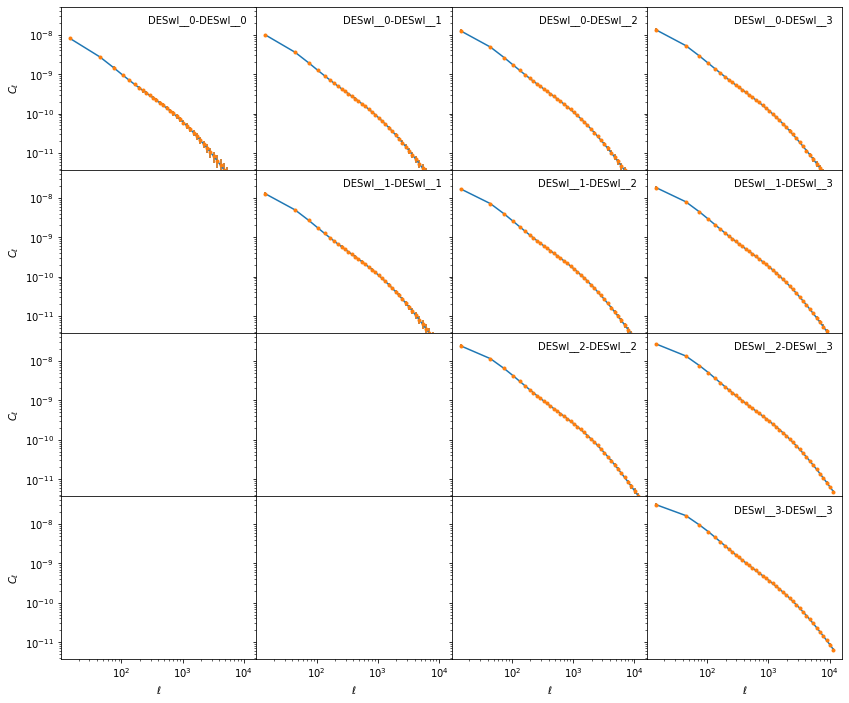

In [33]:
# wl-wl
f, ax = plt.subplots(4, 4, figsize=(14, 12), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i in range(4):
    tr1 = f'DESwl__{i}'
    for j in range(i, 4):
        tr2 = f'DESwl__{j}'
        ell, cl, cov, ind = s.get_ell_cl('cl_ee', tr1, tr2, return_cov=True, return_ind=True)

        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))

        cov = covG_rsh[ind][:, ind]
        ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')
        
        assert np.any(cov)

        ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
         verticalalignment='top', transform=ax[i, j].transAxes)
        ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')

plt.show()
plt.close()

In [8]:
# Using final_gen_lsst.py functions

ts = ['DESgc__0', 'DESgc__1', 'DESgc__2', 'DESgc__3', 'DESgc__4', 'DESwl__0', 'DESwl__1', 'DESwl__2', 'DESwl__3']
qs = ['galaxy_density'] * 5 + ['galaxy_shear'] * 4
ps = ['0'] * 5 + ['e']  * 4
nt = len(ts)

def get_dtype(t1, t2):
    pol1 = 'e' if 'wl' in t1 else '0'
    pol2 = 'e' if 'wl' in t2 else '0'
    dtype = f'cl_{pol1}{pol2}'
    if dtype == 'cl_e0':
        dtype = 'cl_0e'
    return dtype
        
def tracer_iterator():
    i_d = 0
    for i1 in range(nt):
        for i2 in range(i1, nt):
            t1 = ts[i1]
            t2 = ts[i2]
            dtype = get_dtype(t1, t2)
            # no cross between different galaxy samples, so don't yield anything
            if ('gc' in t1) and ('gc' in t2) and (t1 != t2):
                continue
            yield i1, i2, t1, t2, i_d, dtype
            i_d += 1

for i1, i2, ti1, ti2, ii, dtype in tracer_iterator():
    print(i1, i2, ti1, ti2, ii, dtype)

0 0 DESgc__0 DESgc__0 0 cl_00
0 5 DESgc__0 DESwl__0 1 cl_0e
0 6 DESgc__0 DESwl__1 2 cl_0e
0 7 DESgc__0 DESwl__2 3 cl_0e
0 8 DESgc__0 DESwl__3 4 cl_0e
1 1 DESgc__1 DESgc__1 5 cl_00
1 5 DESgc__1 DESwl__0 6 cl_0e
1 6 DESgc__1 DESwl__1 7 cl_0e
1 7 DESgc__1 DESwl__2 8 cl_0e
1 8 DESgc__1 DESwl__3 9 cl_0e
2 2 DESgc__2 DESgc__2 10 cl_00
2 5 DESgc__2 DESwl__0 11 cl_0e
2 6 DESgc__2 DESwl__1 12 cl_0e
2 7 DESgc__2 DESwl__2 13 cl_0e
2 8 DESgc__2 DESwl__3 14 cl_0e
3 3 DESgc__3 DESgc__3 15 cl_00
3 5 DESgc__3 DESwl__0 16 cl_0e
3 6 DESgc__3 DESwl__1 17 cl_0e
3 7 DESgc__3 DESwl__2 18 cl_0e
3 8 DESgc__3 DESwl__3 19 cl_0e
4 4 DESgc__4 DESgc__4 20 cl_00
4 5 DESgc__4 DESwl__0 21 cl_0e
4 6 DESgc__4 DESwl__1 22 cl_0e
4 7 DESgc__4 DESwl__2 23 cl_0e
4 8 DESgc__4 DESwl__3 24 cl_0e
5 5 DESwl__0 DESwl__0 25 cl_ee
5 6 DESwl__0 DESwl__1 26 cl_ee
5 7 DESwl__0 DESwl__2 27 cl_ee
5 8 DESwl__0 DESwl__3 28 cl_ee
6 6 DESwl__1 DESwl__1 29 cl_ee
6 7 DESwl__1 DESwl__2 30 cl_ee
6 8 DESwl__1 DESwl__3 31 cl_ee
7 7 DESwl__2 DESwl

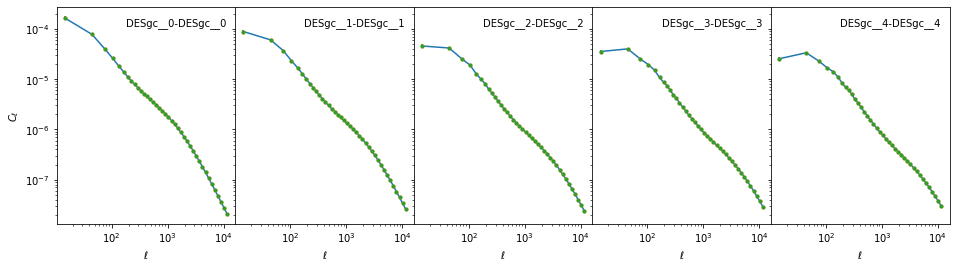

In [9]:
# gc-gc
f, ax = plt.subplots(1, 5, figsize=(16, 4), sharex=True, gridspec_kw={'wspace':0}, sharey=True)

i = 0
for i1, i2, ti1, ti2, ii, dtype in tracer_iterator():
    if dtype != 'cl_00':
        continue
    tr1, tr2 = ti1, ti2
    ell, cl, cov, ind = s.get_ell_cl('cl_00', tr1, tr2, return_cov=True, return_ind=True)
    
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))
    
    cov = covG_rsh[ind][:, ind]
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')
    
    cov = covG[ii, :, ii, :]
#     cov = covG[:, ii, :, ii]
    ax[i].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')   
    
    ax[i].set_xlabel('$\ell$')
    ax[i].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
     verticalalignment='top', transform=ax[i].transAxes)
    
    i+= 1
    
ax[0].set_ylabel('$C_\ell$')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
plt.show()
plt.close()

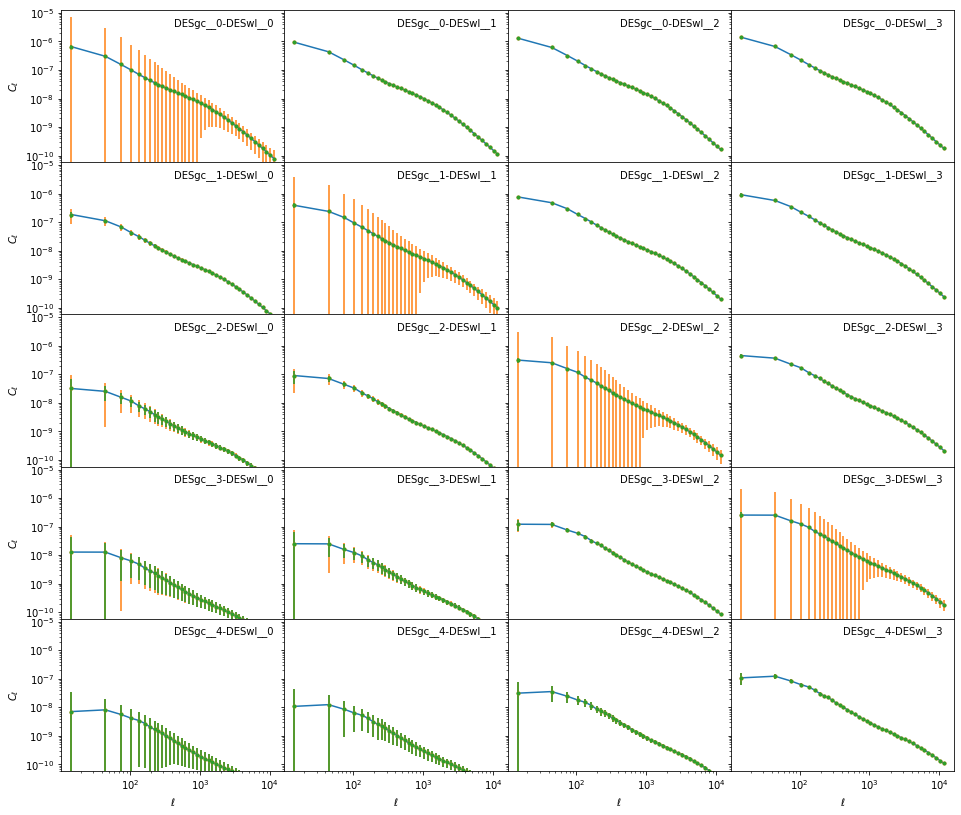

In [10]:
# gc-wl
f, ax = plt.subplots(5, 4, figsize=(16, 14), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i1, i2, ti1, ti2, ii, dtype in tracer_iterator():
    if dtype != 'cl_0e':
        continue
    tr1, tr2 = ti1, ti2
    i, j = int(tr1[-1]), int(tr2[-1])
    
    ell, cl, cov, ind = s.get_ell_cl('cl_0e', tr1, tr2, return_cov=True, return_ind=True)
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))

    cov = covG_rsh[ind][:, ind]
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')    
    
    cov = covG[ii, :, ii, :]
#     cov = covG[:, ii, :, ii]
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')

    ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
     verticalalignment='top', transform=ax[i, j].transAxes)
    ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')
plt.show()
plt.close()

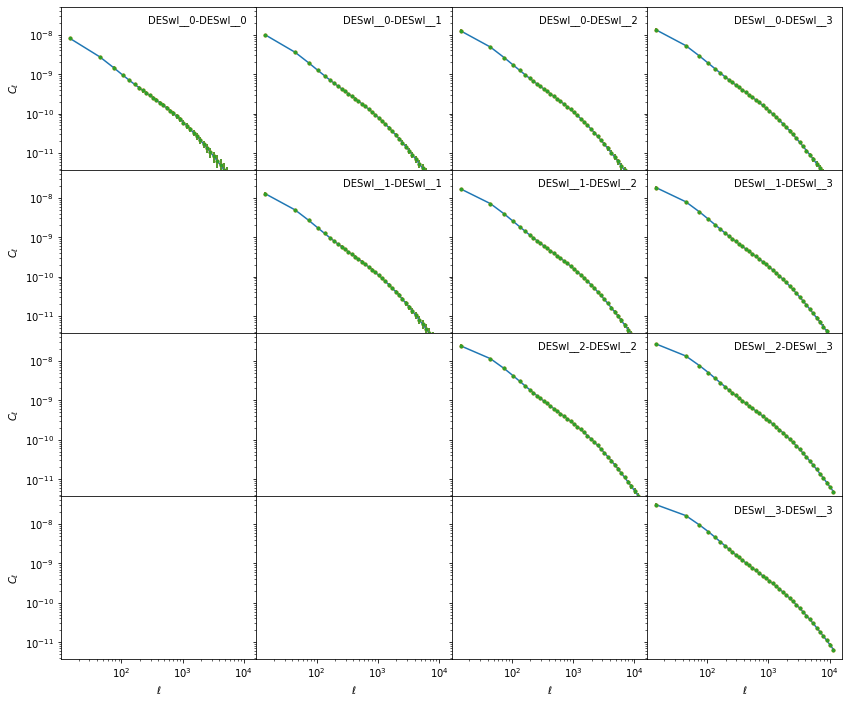

In [11]:
# gc-wl
f, ax = plt.subplots(4, 4, figsize=(14, 12), sharex=True, gridspec_kw={'wspace':0, 'hspace': 0}, sharey=True)
for i1, i2, ti1, ti2, ii, dtype in tracer_iterator():
    if dtype != 'cl_ee':
        continue
    tr1, tr2 = ti1, ti2
    i, j = int(tr1[-1]), int(tr2[-1])
    
    ell, cl, cov, ind = s.get_ell_cl('cl_ee', tr1, tr2, return_cov=True, return_ind=True)
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)))

    cov = covG_rsh[ind][:, ind]
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')    
    
    cov = covG[ii, :, ii, :]
#     cov = covG[:, ii, :, ii]
    ax[i, j].errorbar(ell, cl, yerr=np.sqrt(np.diag(cov)), fmt='.')

    ax[i, j].text(0.95, 0.95, f'{tr1}-{tr2}', horizontalalignment='right',
     verticalalignment='top', transform=ax[i, j].transAxes)
    ax[-1, j].set_xlabel('$\ell$')

    ax[i, 0].set_ylabel('$C_\ell$')
    
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')
plt.show()
plt.close()